In [1]:
%config InlineBackend.figure_format = 'svg' # change output plot display format to 'svg'

# import the required modules for this notebook
import numpy as np
import matplotlib.pyplot as plt

# import the helper functions from the parent directory,
# these help with things like graph plotting and notebook layout
import sys
sys.path.append('..')
#from helper_functions import *

# set things like fonts etc - comes from helper_functions
#set_notebook_preferences()

# add a show/hide code button - also from helper_functions
#toggle_code(title = "setup code")

# Gaussian Processes

In [9]:
def SE_kernel(x, scale, sigma, der_scale = False, der_sigma = False):
    repeated_xs = np.repeat(x, [x.shape[-1]], axis = 0)
    x_diffs = repeated_xs - repeated_xs.T
    
    if der_scale:
        coeff = 2*scale**2*sigma**2
        return coeff*np.exp(-0.5*(x_diffs)**2/scale**2)*0.5*(x_diffs)**2/scale**4
    
    elif der_sigma:
        return 2*sigma**2*np.exp(-0.5*(x_diffs)**2/scale**2)
    
    return sigma**2*np.exp(-0.5*(x_diffs)**2/scale**2)

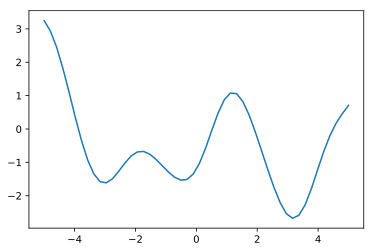

In [10]:
np.random.seed(1)

x = np.linspace(-5, 5, 50)
S = SE_kernel(np.array([x]), scale = 1, sigma = 2) + np.eye(len(x))*10**-6
Q = np.linalg.cholesky(S)

y = Q.dot(np.random.randn(len(x)))
plt.plot(x, y)
plt.show()

np.save('gp_dataset_x.npy', x)
np.save('gp_dataset_y.npy', y)

In [11]:
rate = 10**-2
scale = 1
sigma = 3

log_scale, log_sigma = np.log(scale), np.log(sigma)


for i in range(10000):
    
    S = squared_exponential(np.array([x]), scale = scale, sigma = sigma)
    Sinv = np.linalg.inv(S + np.eye(S.shape[0])*10**-6)
    Sinv_y = Sinv.dot(y)
    
    dS_scale = squared_exponential(np.array([x]), scale = scale, sigma = sigma,
                                   der_scale = True)
    
    dL_scale = 0.5*(Sinv_y.T).dot(dS_scale).dot(Sinv_y) - 0.5*np.trace(Sinv.dot(dS_scale))
    
    dS_sigma = squared_exponential(np.array([x]), scale = scale, sigma = sigma,
                                   der_sigma = True)
    
    dL_sigma = 0.5*(Sinv_y.T).dot(dS_sigma).dot(Sinv_y) - 0.5*np.trace(Sinv.dot(dS_sigma))
    
    log_scale += dL_scale*rate/S.shape[0]
    scale = np.exp(log_scale)
    
    log_sigma += dL_sigma*rate/S.shape[0]
    sigma = np.exp(log_sigma)
    
print(scale, sigma)

1.05824577882 1.92812195811


In [ ]:
def SE_predictive(x_train, y_train, x_pred, y_pred, scale, variance, sigma):
    

In [612]:
def periodic(x, scale, sigma, period, der_scale = False, der_sigma = False, der_period = False):
    repeated_xs = np.repeat(x, [x.shape[-1]], axis = 0)
    x_diffs = repeated_xs - repeated_xs.T
    
    value = sigma**2*np.exp(-2*np.sin(np.pi*np.abs(x_diffs)/period)**2/scale**2)
    
    if der_scale:
        return 2*value*4*np.sin(np.pi*np.abs(x_diffs)/period)**2/scale**3
    
    elif der_sigma:
        return 2*value
    
    elif der_period:
        coeff = 2*np.sin(2*np.pi*np.abs(x_diffs)/period)/scale**2*np.pi*np.abs(x_diffs)/period**2
        return value*coeff
    
    return value

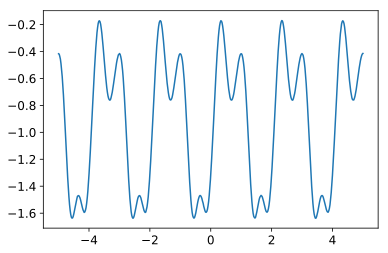

In [613]:
np.random.seed(2)

x = np.linspace(-5, 5, 500)
S = periodic(np.array([x]), scale = 1, sigma = 1, period = 2) + np.eye(len(x))*10**-6
Q = np.linalg.cholesky(S)

y = Q.dot(np.random.randn(len(x)))
plt.plot(x, y)
plt.show()

np.save('gp_per_x.npy', x)
np.save('gp_per_y.npy', y)

In [614]:
rate = 10**-3
scale, sigma, period = 1, 2, 2
log_scale, log_sigma, log_period = np.log(scale), np.log(sigma), np.log(period)

for i in range(1000):
    
    S = periodic(np.array([x]), scale = scale, sigma = sigma, period = period)
    Sinv = np.linalg.inv(S + np.eye(S.shape[0])*10**-6)
    Sinv_y = Sinv.dot(y)
    
    dS_scale = periodic(np.array([x]), scale = scale, sigma = sigma, period = period,
                        der_scale = True)
    
    dL_scale = 0.5*(Sinv_y.T).dot(dS_scale).dot(Sinv_y) - 0.5*np.trace(Sinv.dot(dS_scale))
    
    dS_sigma = periodic(np.array([x]), scale = scale, sigma = sigma, period = period,
                        der_sigma = True)
    
    dL_sigma = 0.5*(Sinv_y.T).dot(dS_sigma).dot(Sinv_y) - 0.5*np.trace(Sinv.dot(dS_sigma))
    
    dS_period = periodic(np.array([x]), scale = scale, sigma = sigma, period = period,
                           der_period = True)
    
    dL_period = 0.5*(Sinv_y.T).dot(dS_period).dot(Sinv_y) - 0.5*np.trace(Sinv.dot(dS_period))
    
    log_scale += dL_scale*rate/S.shape[0]
    scale = np.exp(log_scale)
    
    log_sigma += dL_sigma*rate/S.shape[0]
    sigma = np.exp(log_sigma)
    
    log_period += dL_period*rate/S.shape[0]
    period = np.exp(log_period)
    
    print(scale, sigma, period)
    
print(scale, sigma, period)

1.0002087299 1.99994271155 2.41214927185
0.779435695222 2.02973779613 2.47429845266e+28
0.779435695222 2.02973459052 2.47429845266e+28
0.779435695222 2.02973138492 2.47429845266e+28
0.779435695222 2.02972817934 2.47429845266e+28
0.779435695222 2.02972497376 2.47429845266e+28
0.779435695222 2.02972176819 2.47429845266e+28
0.779435695222 2.02971856263 2.47429845266e+28
0.779435695222 2.02971535707 2.47429845266e+28
0.779435695222 2.02971215152 2.47429845266e+28
0.779435695222 2.02970894598 2.47429845266e+28
0.779435695222 2.02970574045 2.47429845266e+28
0.779435695222 2.02970253493 2.47429845266e+28
0.779435695222 2.0296993294 2.47429845266e+28
0.779435695222 2.0296961239 2.47429845266e+28
0.779435695222 2.0296929184 2.47429845266e+28
0.779435695222 2.0296897129 2.47429845266e+28
0.779435695222 2.02968650742 2.47429845266e+28
0.779435695222 2.02968330193 2.47429845266e+28
0.779435695222 2.02968009645 2.47429845266e+28
0.779435695222 2.02967689099 2.47429845266e+28
0.779435695222 2.029673

KeyboardInterrupt: 

In [ ]:
class Kernel:
    
    def __init__(self, components = None, parameters = [], child_operation = None):
        self.params = parameters
        self.components = components
        self.comp_operation = comp_operation
    
    def __add__(self, other):
        return kernel([self, other], components = [self, other],
                      parameters = [self.parameters, other.parameters],
                      comp_operation = float.__add__)
    
    def __mul__(self, other):
        return kernel([self, other], components = [self, other],
                      parameters = [self.parameters, other.parameters],
                      comp_operation = float.__mul__)
    
    def evaluate(self, x, derivatives):
        if len(self.components) == 2:
            comp0 = self.components[0].evaluate(x, derivatives[0])
            comp1 = self.components[1].evaluate(x, derivatives[1])
            return self.comp_operation(comp1, comp2)
        
        else:
            return self.evaluate(x, derivatives)
        
    
class squared_exponential(Kernel):
    
    def __init__(self, parameters = [], children = None, child_operation = None):
        
        Kernel.__init__(self, parameters, children, child_operation)
    
    def evaluate(x, derivatives = [False, False]):
        repeated_xs = np.repeat(x, [x.shape[-1]], axis = 0)
        x_diffs = repeated_xs - repeated_xs.T
        
        if derivatives[0]:
            coeff = 2*scale**2*sigma**2
            return coeff*np.exp(-0.5*(x_diffs)**2/scale**2)*0.5*(x_diffs)**2/scale**4
    
        elif derivatives[1]:
            return 2*sigma**2*np.exp(-0.5*(x_diffs)**2/scale**2)
    
        return sigma**2*np.exp(-0.5*(x_diffs)**2/scale**2)

In [ ]:
class GP:
    
    def __init__(self, x, y, kernel_func, parameters):
        self.kernel = kernel_func
        self.x = x
        self.y = y
    
    def optimise_hyperparameters(self):
        pass
    
    def get_posterior(self):
        pass
    
    def draw_from_posterior(self):
        pass